In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df_siswa = pd.read_csv("/content/drive/MyDrive/Dataset/lomba/Dataset1_TranscriptMahasiswa.csv",sep = ';')
df_matkul = pd.read_csv("/content/drive/MyDrive/Dataset/lomba/Dataset2_EvaluasiDosenPerMK.csv",sep = ";")


In [ ]:
#Fungsi Untuk cek perbedaan value
def check_val(x,y):
  w = 0
  for i in np.unique(x.values):#lengkap
      if i not in np.unique(y.values):#yang di check
        w = w + 1
        print(w,':',i)
  

def null_check(x,y):
    total = x.isnull().sum().sort_values(ascending=False)
    percent = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(y)

def boxplot(column):
    sns.boxplot(data=df_finalis,x=df_finalis[f"{column}"])
    plt.title(f"Boxplot of  {column}")
    plt.show()

In [ ]:
pd.set_option('max_rows', 99)

# Preprocessing df matkul


In [ ]:
df_matkul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TAHUN       2114 non-null   int64 
 1   SEMESTER    2114 non-null   int64 
 2   MATAKULIAH  2114 non-null   object
 3   PERTANYAAN  2114 non-null   int64 
 4   KETERANGAN  2114 non-null   object
 5   NILAI       2114 non-null   object
dtypes: int64(3), object(3)
memory usage: 99.2+ KB


In [ ]:
null_check(df_matkul,10)

,Total,Percent
TAHUN,0,0.0
SEMESTER,0,0.0
MATAKULIAH,0,0.0
PERTANYAAN,0,0.0
KETERANGAN,0,0.0
NILAI,0,0.0


In [ ]:
df_matkul["NILAI"] = [float(str(i).replace(",", ".")) for i in df_matkul["NILAI"]]
df_matkul["KODE_MK"]=[i[:5] for i in df_matkul["MATAKULIAH"]]
df_matkul["NAMA_MK"]=[i[6:] for i in df_matkul["MATAKULIAH"]]
df_matkul["NAMA_MK"]=df_matkul["NAMA_MK"].apply(str)
df_matkul['SEMESTER'] = df_matkul['SEMESTER'].apply(str)
df_matkul.drop('MATAKULIAH', axis=1, inplace=True)
df_matkul



,TAHUN,SEMESTER,PERTANYAAN,KETERANGAN,NILAI,KODE_MK,NAMA_MK
0,2015,1511,1,Kesiapan memberikan perkuliahan/praktikum,3.28,IS100,Management Information Systems
1,2015,1511,2,Upaya menyampaikan materi perkuliahan/praktik...,3.25,IS100,Management Information Systems
2,2015,1511,3,Sistematis dalam menyampaikan materi perkuliah...,3.24,IS100,Management Information Systems
3,2015,1511,4,Kemampuan memberikan contoh yang relevan dari ...,3.30,IS100,Management Information Systems
4,2015,1511,5,Penyampaian materi perkuliahan sesuai dengan k...,3.27,IS100,Management Information Systems
...,...,...,...,...,...,...,...
2109,2018,1821,10,Pemberian tugas/kuis serta pembahasannya di kelas,3.45,IS726,Innovation in Information and Technology
2110,2018,1821,11,Kemampuan memotivasi semangat belajar mahasiswa,3.41,IS726,Innovation in Information and Technology
2111,2018,1821,12,"Kemampuan menerima kritik, saran dan pendapat",3.48,IS726,Innovation in Information and Technology
2112,2018,1821,13,Fairness dalam memberikan penilaian,3.49,IS726,Innovation in Information and Technology


In [ ]:
# df_siswa.loc[df_siswa['KODE_MK'] =='SI863']


In [ ]:
# for i in df_matkul['KODE_MK']=='IS100':
#   if i==True:
#      print(i)

In [ ]:
df_matkul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TAHUN       2114 non-null   int64  
 1   SEMESTER    2114 non-null   object 
 2   PERTANYAAN  2114 non-null   int64  
 3   KETERANGAN  2114 non-null   object 
 4   NILAI       2114 non-null   float64
 5   KODE_MK     2114 non-null   object 
 6   NAMA_MK     2114 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 115.7+ KB


In [ ]:
df_eval = df_matkul.groupby(
     ['SEMESTER','NAMA_MK']
 ).agg(
    
     sem_score = ('NILAI','mean'),
      
 ).reset_index()



In [ ]:
# Untuk Visualisasi Data
df_eval.to_csv('matkul.csv',index=False)

# Preprocessing DF siswa


In [ ]:
df_siswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NIM       30870 non-null  int64  
 1   ANGKATAN  30870 non-null  int64  
 2   SEMESTER  30870 non-null  int64  
 3   KODE_MK   30870 non-null  object 
 4   NAMA_MK   30847 non-null  object 
 5   SKS       30870 non-null  int64  
 6   NILAI     30858 non-null  float64
 7   GRADE     30318 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.9+ MB


Bisa dipastikan nilai Null berarti siswa melakukan pelanggaran akademik karena semua ber grade F maka bisa di drop

In [ ]:
null_check(df_siswa,10)

,Total,Percent
GRADE,552,0.017881
NAMA_MK,23,0.000745
NILAI,12,0.000389
NIM,0,0.000000
ANGKATAN,0,0.000000
SEMESTER,0,0.000000
KODE_MK,0,0.000000
SKS,0,0.000000


In [ ]:
#Merubah Semester Menjadi String agar bisa di manipulasi
df_siswa["SEMESTER"]=df_siswa['SEMESTER'].apply(str)
#Untuk menambahkan spasi sebagai pembeda dengan 22 yang ada ditengah ,contoh : 1221, 22 nya terletak ditengah dan itu bukan termasuk outlier
df_siswa["SEMESTER"]=df_siswa["SEMESTER"].str.ljust(5, " ")
#disini sudah saya ganti '22 ' menjadi '21 ' 
df_siswa["SEMESTER"] = [str(str(i).replace("22 ", "21 ")) for i in df_siswa["SEMESTER"]]
#Untuk Menghilangkan spasi yang ada di SEMESTER
df_siswa["SEMESTER"] = df_siswa["SEMESTER"].str.rstrip()

np.unique(df_siswa.SEMESTER)


array(['1011', '1021', '1111', '1121', '1211', '1221', '1311', '1321',
       '1411', '1421', '1511', '1521', '1611', '1621', '1711', '1721',
       '1811', '1821', '1911'], dtype=object)

In [ ]:
np.unique(df_siswa['SEMESTER'])

array(['1011', '1021', '1111', '1121', '1211', '1221', '1311', '1321',
       '1411', '1421', '1511', '1521', '1611', '1621', '1711', '1721',
       '1811', '1821', '1911'], dtype=object)

In [ ]:
df_siswa["SEMESTER"].value_counts()

1811    2813
1821    2696
1721    2364
1711    2279
1611    2166
1621    2153
1521    2032
1511    2000
1411    1917
1421    1761
1311    1577
1321    1529
1221    1309
1211    1261
1121    1084
1111     940
1021     529
1011     455
1911       5
Name: SEMESTER, dtype: int64

In [ ]:

df_siswa['NAMA_MK'] = df_siswa['NAMA_MK'].astype(str)

In [ ]:
df_siswa.loc[df_siswa['NAMA_MK'].isnull()]

,NIM,ANGKATAN,SEMESTER,KODE_MK,NAMA_MK,SKS,NILAI,GRADE


In [ ]:
#Mengganti Null menjadi 0
df_siswa["NILAI"].fillna("0", inplace = True)


# null pada data nama mk itu banyak yang ber kode SI863

df_siswa['NAMA_MK'] = np.where((df_siswa.KODE_MK == 'SI863'),"Tugas Akhir",df_siswa.NAMA_MK)


In [ ]:
# df_siswa.loc[df_siswa['NIM']==8429]

In [ ]:
null_check(df_siswa,10)

,Total,Percent
GRADE,552,0.017881
NIM,0,0.000000
ANGKATAN,0,0.000000
SEMESTER,0,0.000000
KODE_MK,0,0.000000
NAMA_MK,0,0.000000
SKS,0,0.000000
NILAI,0,0.000000


In [ ]:
# dapat saya simpulkan bahwa nama mk yang kosong = kode mk yang ber kode 'SI863'oleh karena itu nan bisa saya tugas akhir
# ab = df_siswa.loc[df_siswa["NAMA_MK"] =='nan']
# np.unique(ab.KODE_MK.values)


In [ ]:
df_siswa.NAMA_MK

0                    EM100 Dasar-dasar Bisnis
1                     EM180 Matematika Bisnis
2             TI100 Algoritma dan Pemrograman
3                    TI101 Matematika Diskrit
4        TI110 Pengantar Teknologi Multimedia
                         ...                 
30865          Interaksi Manusia dan Komputer
30866              Probabilitas dan Statistik
30867                     Perilaku Organisasi
30868             Algoritma dan Struktur Data
30869                        Bahasa Inggris 2
Name: NAMA_MK, Length: 30870, dtype: object

In [ ]:

#List untuk menyimpan key yang harus diganti
key= []

#List untuk menyimpan value yang sudah ditransformasi
val = []

#Looping pada semua nilai di nama_mk
for i in np.unique(df_siswa.NAMA_MK):
  # disini saya pasang logic jika di index 3 = int, maka key nya saya simpan dan saya simpan juga nilai yang tertransformasi
   if i[3:4] in ['0','1','2','3','4','5','6','7','8','9']:
     key.append(i)
     val.append(i[6:])

     
# menzip list saya agar bisa jadi dictionary
zip_iterator = zip(key, val)

# membuat dictionary
a_dictionary = dict(zip_iterator)
# Transformasi data menggunakan dictionary
df_siswa = df_siswa.replace({"NAMA_MK": a_dictionary})


In [ ]:
# df_siswa.loc[df_siswa["NAMA_MK"] == "nan"]

In [ ]:
df_matkul["NAMA_MK"]=df_matkul['NAMA_MK'].apply(str)

In [ ]:
# df_eng = cop

# df_siswa.NAMA_MK = df_siswa.NAMA_MK.apply(lambda x: translator.translate(x, dest='en')
# df_en = df_siswa.copy()
# df_en.rename(columns=lambda x: Translator.translate(x).text, inplace=True)
# df['translated_value'] = df['value'].apply(lambda x: translator.translate(x, dest='en').text)
# translations = { }

# for element in df_matkul.NAMA_MK.unique():
#         # add translation to the dictionary
#         translations[element] = translator.translate(element).text


# zip_iterator = zip(key, val)

# a_dictionary = dict(zip_iterator)

# df_siswa = df_siswa.replace({"NAMA_MK": a_dictionary})


*   Hasil observasi data semua kode MK yang berada di tabel matkul tersedia
*   Item daftar




In [ ]:
df_siswa.drop('KODE_MK', axis=1, inplace=True)

df_forsks = df_siswa.copy()

In [ ]:
#saya berikan sks 0 kepada grade D,E dan F karena syarat lulus tidak boleh ada grade bernilai tersebut.
df_siswa['SKS'] = np.where((df_siswa.GRADE == 'D'),0,df_siswa.SKS)
df_siswa['SKS'] = np.where((df_siswa.GRADE == 'E'),0,df_siswa.SKS)
df_siswa['SKS'] = np.where((df_siswa.GRADE == 'F'),0,df_siswa.SKS)


In [ ]:
df_siswa['NILAI'] = df_siswa['NILAI'].astype(float)
df_siswa['BOBOT'] = df_siswa['NILAI']
df_siswa['GRADE']  = pd.cut(df_siswa.NILAI,[0,44.99,54.99,59.99,64.99,69.99,74.99,79.99,84.99,100],labels=["E","D","C","C+","B-","B","B+","A-","A"])
df_siswa['BOBOT']  = pd.cut(df_siswa.NILAI,[0,44.99,54.99,59.99,64.99,69.99,74.99,79.99,84.99,100],labels=[0,1.0,2.0,2.3,2.7,3.0,3.3,3.7,4])



karena disini nilai nan dikarena kan nilai yang 0 maka saya bisa mengisi grade dengan f dan bobot dengan 0

In [ ]:
#Terjadi eror jika tidak saya ganti menjadi string terlebih dahulu
df_siswa['GRADE'] = df_siswa['GRADE'].astype(str)
df_siswa["GRADE"].fillna('F', inplace = True)
df_siswa["BOBOT"].fillna(0, inplace = True)

df_siswa['GRADE'] = pd.Categorical(df_siswa['GRADE'])

In [ ]:
null_check(df_siswa,5)

,Total,Percent
NIM,0,0.0
ANGKATAN,0,0.0
SEMESTER,0,0.0
NAMA_MK,0,0.0
SKS,0,0.0


In [ ]:
null_check(df_siswa,10)

,Total,Percent
NIM,0,0.0
ANGKATAN,0,0.0
SEMESTER,0,0.0
NAMA_MK,0,0.0
SKS,0,0.0
NILAI,0,0.0
GRADE,0,0.0
BOBOT,0,0.0


In [ ]:
df_siswa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30870 entries, 0 to 30869
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NIM       30870 non-null  int64   
 1   ANGKATAN  30870 non-null  int64   
 2   SEMESTER  30870 non-null  object  
 3   NAMA_MK   30870 non-null  object  
 4   SKS       30870 non-null  int64   
 5   NILAI     30870 non-null  float64 
 6   GRADE     30870 non-null  category
 7   BOBOT     30870 non-null  category
dtypes: category(2), float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [ ]:
df_siswa['NILAI'] = df_siswa['NILAI'].astype(float)

In [ ]:
# for i in df_siswa.select_dtypes(include=np.number).columns.tolist():  
  # print(i)
# boxplot('NILAI')

In [ ]:
df_siswa.SEMESTER = df_siswa.SEMESTER.apply(pd.to_numeric)
df_siswa['Tahun_Ajar'] = df_siswa['SEMESTER']

df_siswa['Tahun_Ajar'] = pd.cut(df_siswa['SEMESTER'],[0,1023,1123,1223,1323,1423,1523,1623,1723,1823,1923],labels = ['2010', '2011','2012','2013','2014', '2015', '2016', '2017', '2018', '2019'],ordered=False)

In [ ]:
df_forsks = df_forsks.drop_duplicates(subset=['NIM','SEMESTER','NAMA_MK'], keep='first')
df_siswa = df_siswa.drop_duplicates(subset=['NIM','SEMESTER','NAMA_MK'], keep='first')

#Bagian Grouping

Untuk mengetahui detail apakah nim tersebut lulus jika tidak maka drop, dan jika lulus ,ditahun berapa terkahir nim tersebut berkuliah


Syarat Lulus :
*  IPK di atas 2.5,4.	Nilai IPK adalah total nilai IPS dibagi dengan total semester.
*   144 SKS.
*   ada nilai D, E, dan F pada setiap mata kuliah.





In [ ]:
df_siswa.Tahun_Ajar= df_siswa.Tahun_Ajar.astype('int')

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_skssem = df_forsks.groupby(
     ['NIM','ANGKATAN','SEMESTER']
 ).agg(
      
      SKS = ('SKS','sum'),

).reset_index()


In [ ]:
df_skssum = df_skssem.groupby(
     ['NIM','ANGKATAN']
 ).agg(
      
      SKS = ('SKS','sum'),
      SKSmean = ('SKS','mean'),
      
).reset_index()     

In [ ]:
#Pengali bobot dan sks

df_siswa.BOBOT = df_siswa.BOBOT.apply(pd.to_numeric)
df_siswa.BOBOT = df_siswa.BOBOT.astype('int')
df_siswa['BOBOTXSKS'] = df_siswa.BOBOT * df_forsks.SKS

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df_final = df_siswa.groupby(
     ['NIM','ANGKATAN','SEMESTER']
 ).agg(
      sumsksbobot = ('BOBOTXSKS','sum'),
      SKS = ('SKS','sum'),
      
      NILAI = ('NILAI','mean'),
      BOBOT = ('BOBOT','mean'),
      TAHUN = ('Tahun_Ajar',np.max),
      
    
     
     
      
 ).reset_index()

df_final["IPS"] = df_final.sumsksbobot / df_skssem.SKS

In [ ]:
# ac = df_final.loc[df_final['NIM']==8429]
# ac.value_counts()

In [ ]:
df_finalis = df_final.groupby(
     ['NIM','ANGKATAN']
 ).agg(
      # sumsksbobot = ('BOBOTXSKS','sum'),
      IPS = ('IPS','sum'),
      IPSmean = ('IPS','mean'),
      SEMESTER = ('SEMESTER','nunique'),
      SKS = ('SKS','sum'),
      SKSmean = ('SKS','mean'),
      meNILAI = ('NILAI','mean'),
      meBOBOT = ('BOBOT','mean'),
      TAHUN = ('TAHUN','nunique'),
       
 ).reset_index()

df_finalis["IPK"] = df_finalis.IPS / df_finalis.SEMESTER

In [ ]:
df_finalis.loc[(df_finalis['NIM'] == 18866)]

,NIM,ANGKATAN,IPS,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK


In [ ]:

df_finalis.SKSmean.replace(df_skssum.SKSmean, inplace=True)

In [ ]:
check_val(df_siswa.NIM,df_finalis.NIM)

In [ ]:
# df_finalis.describe()

In [ ]:

# df_finalis["durasi"] = df_finalis.TAHUN - df_finalis.ANGKATAN

df_finalis.drop('IPS', axis=1, inplace=True)



df_finalis["lulusTEPAT"] = (df_finalis.IPK > 2.5) & (df_finalis.SKS >= 144) & (df_finalis.TAHUN <= 4)
df_finalis["lulus"] = (df_finalis.IPK > 2.5) & (df_finalis.SKS >= 144)
df_finalis['lulusTEPAT'] = (df_finalis['lulusTEPAT'] == True).astype(int)
df_finalis['lulus'] = (df_finalis['lulus'] == True).astype(int)


In [ ]:


# df_finalis.drop('SKS', axis=1, inplace=True)

# df_finalis.drop('TAHUN', axis=1, inplace=True)


# df_finalis.drop('IPS', axis=1, inplace=True)

Disini terlihat banyak yang false, agar tidak terjadi Imbalanced data set saya akan drop nim yang memang belum waktunya untuk lulus

In [ ]:
 df_finalis['lulusTEPAT'].value_counts(normalize=True)

0    0.781818
1    0.218182
Name: lulusTEPAT, dtype: float64

In [ ]:
df_finalis =  df_finalis.set_index('NIM')

In [ ]:
df_siswaall = df_finalis.copy()

In [ ]:
df_finalis.to_csv('semuamhs.csv',index=False)

In [ ]:
df_finalis.loc[(df_finalis['ANGKATAN'] == 2016) & (df_finalis.lulus == 1)]
# df_siswa['SKS'] = np.where((df_siswa.GRADE == 'D'),0,df_siswa.SKS)

,ANGKATAN,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK,lulusTEPAT,lulus
NIM,,,,,,,,,,,


Sekarang data sudah tidak terlalu imbalanced

In [ ]:
predtarg = df_finalis.loc[df_finalis['ANGKATAN'] >= 2016]

df_finalis.drop(df_finalis.index[df_finalis['ANGKATAN'] >= 2016], inplace=True)


In [ ]:
 df_finalis['lulusTEPAT'].value_counts(normalize=True)

0    0.612903
1    0.387097
Name: lulusTEPAT, dtype: float64

In [ ]:
df_finalis.to_csv('lulusmhs.csv',index=False)

# Exploratory Data Analysis(EDA)

In [ ]:
tepatlulus = df_finalis.loc[df_finalis['lulusTEPAT'] == 1]
xtepat = df_finalis.loc[df_finalis['lulusTEPAT'] == 0]

In [ ]:
tepatlulus.describe()

,ANGKATAN,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK,lulusTEPAT,lulus
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.0,168.000000,168.0,168.0
mean,2012.404762,3.333746,7.785714,144.988095,17.136586,81.528144,3.339059,4.0,3.333746,1.0,1.0
std,1.664127,0.272586,0.411553,1.203727,3.415748,4.687921,0.268611,0.0,0.272586,0.0,0.0
min,2010.000000,2.772795,7.000000,144.000000,11.000000,70.845486,2.783503,4.0,2.772795,1.0,1.0
25%,2011.000000,3.114442,8.000000,145.000000,18.125000,77.970351,3.121838,4.0,3.114442,1.0,1.0
50%,2013.000000,3.317819,8.000000,145.000000,18.125000,81.350149,3.325149,4.0,3.317819,1.0,1.0
75%,2014.000000,3.555996,8.000000,145.000000,18.125000,84.909598,3.560268,4.0,3.555996,1.0,1.0
max,2015.000000,4.000000,8.000000,151.000000,21.571429,92.877232,4.000000,4.0,4.000000,1.0,1.0


In [ ]:
xtepat.describe()

,ANGKATAN,IPSmean,SEMESTER,SKS,SKSmean,meNILAI,meBOBOT,TAHUN,IPK,lulusTEPAT,lulus
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.0,266.000000
mean,2013.045113,2.757901,8.894737,133.067669,15.266103,72.703932,2.764439,4.687970,2.757901,0.0,0.090226
std,1.777701,0.394962,1.251494,18.270585,2.666719,6.603854,0.394100,0.817501,0.394962,0.0,0.287045
min,2010.000000,1.098306,7.000000,39.000000,4.875000,42.817284,1.104167,4.000000,1.098306,0.0,0.000000
25%,2011.000000,2.549464,8.000000,134.250000,13.818750,69.397433,2.559086,4.000000,2.549464,0.0,0.000000
50%,2014.000000,2.811010,8.000000,140.000000,15.777778,73.566964,2.815761,5.000000,2.811010,0.0,0.000000
75%,2015.000000,2.992276,9.000000,142.000000,17.625000,76.788382,2.997050,5.000000,2.992276,0.0,0.000000
max,2015.000000,3.688861,14.000000,151.000000,20.285714,88.270089,3.686012,7.000000,3.688861,0.0,1.000000


In [ ]:
y = df_finalis.lulusTEPAT
#Disini saya melakukan uji coba mengalahklan model dengan menyaring data berdasarkan minimal,25 % dan 50% dari kelompok data yang lulustepat waktu
trypredmin = df_finalis.loc[(df_finalis['IPSmean'] > 2.810764) & (df_finalis.meNILAI > 70.845486) & (df_finalis.meBOBOT > 2.790306)  & (df_finalis.SKSmean > 18.000000)]
trypred25 = df_finalis.loc[(df_finalis['IPSmean'] > 3.115021) & (df_finalis.meNILAI > 77.982462) & (df_finalis.meBOBOT > 3.121838) & (df_finalis.SKSmean > 18.125000)]

In [ ]:
trypredmin = (df_finalis['IPSmean'] >= 2.772795) & (df_finalis.meNILAI >= 70.845486) & (df_finalis.meBOBOT >= 2.783503 ) & (df_finalis.SKSmean >= 11.000000)
trypredmin25 = (df_finalis['IPSmean'] >= 3.114442) & (df_finalis.meNILAI >= 77.970351) & (df_finalis.meBOBOT >= 3.121838) & (df_finalis.SKSmean >= 18.125000).astype(int)
trypredmin50 = (df_finalis['IPSmean'] >= 3.317819) & (df_finalis.meNILAI >= 81.350149) & (df_finalis.meBOBOT >= 3.325149) & (df_finalis.SKSmean >= 18.125000).astype(int)



Dari sini model saya tebukti masih memiliki score terbaik

In [ ]:
# y_pred

from sklearn.metrics import accuracy_score


# accuracy_score(y, y_pred)



In [ ]:
accuracy_score(y,trypredmin.astype(int))

0.6682027649769585

In [ ]:
accuracy_score(y,trypredmin25.astype(int))

0.8294930875576036

In [ ]:
accuracy_score(y,trypredmin50.astype(int))

0.7488479262672811

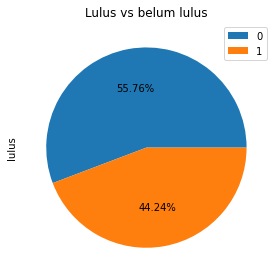

In [ ]:
df_finalis['lulus'].value_counts().plot.pie(autopct='%.2f%%',labels=None, legend=True)
plt.title('Lulus vs belum lulus')
plt.tight_layout()


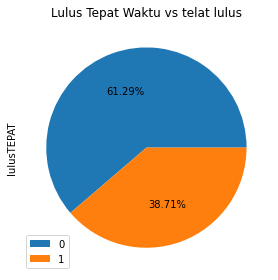

In [ ]:
df_finalis['lulusTEPAT'].value_counts().plot.pie(autopct='%.2f%%',labels=None, legend=True)
plt.title('Lulus Tepat Waktu vs telat lulus')
plt.tight_layout()


Numerik Vs Target

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


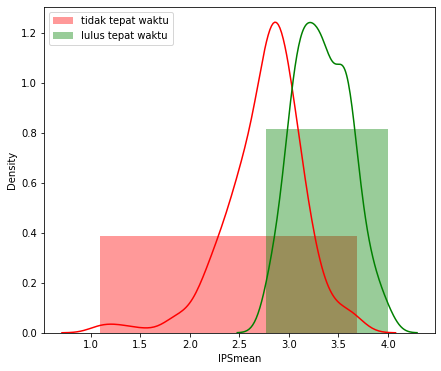

In [ ]:
#IPS MEAN
plt.figure(figsize=(7,6))
sns.distplot(df_finalis.IPSmean[df_finalis.lulusTEPAT == 0],bins=1,color ="r",label ='tidak tepat waktu'),
sns.distplot(df_finalis.IPSmean[df_finalis.lulusTEPAT == 1],bins=1,color ="g",label ='lulus tepat waktu'),
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


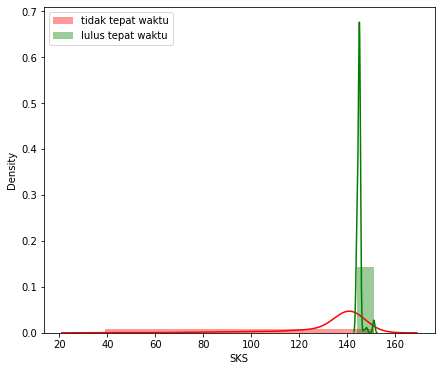

In [ ]:
#SKS 
plt.figure(figsize=(7,6))
sns.distplot(df_finalis.SKS[df_finalis.lulusTEPAT == 0],bins=1,color ="r",label ='tidak tepat waktu'),
sns.distplot(df_finalis.SKS[df_finalis.lulusTEPAT == 1],bins=1,color ="g",label ='lulus tepat waktu'),
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


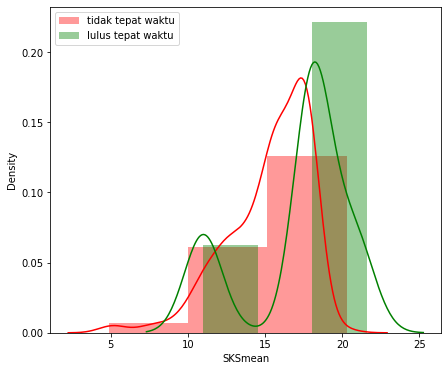

In [ ]:
#SKSMEAN
plt.figure(figsize=(7,6))
sns.distplot(df_finalis.SKSmean[df_finalis.lulusTEPAT == 0],bins=3,color ="r",label ='tidak tepat waktu'),
sns.distplot(df_finalis.SKSmean[df_finalis.lulusTEPAT == 1],bins=3,color ="g",label ='lulus tepat waktu'),
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


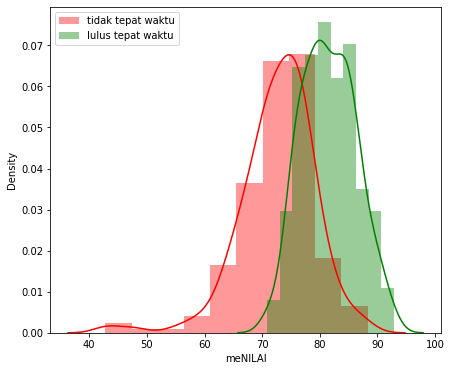

In [ ]:
#meNilai
plt.figure(figsize=(7,6))
sns.distplot(df_finalis.meNILAI[df_finalis.lulusTEPAT == 0],bins=10,color ="r",label ='tidak tepat waktu'),
sns.distplot(df_finalis.meNILAI[df_finalis.lulusTEPAT == 1],bins=10,color ="g",label ='lulus tepat waktu'),
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


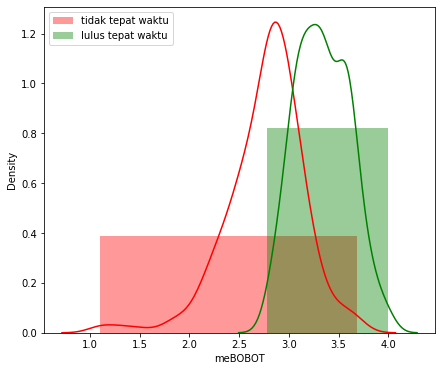

In [ ]:
#meBOBOT
plt.figure(figsize=(7,6))
sns.distplot(df_finalis.meBOBOT[df_finalis.lulusTEPAT == 0],bins=1,color ="r",label ='tidak tepat waktu'),
sns.distplot(df_finalis.meBOBOT[df_finalis.lulusTEPAT == 1],bins=1,color ="g",label ='lulus tepat waktu'),
plt.legend();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


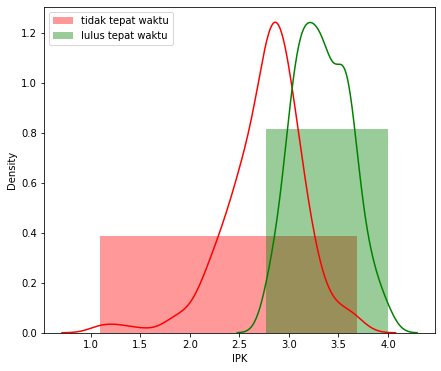

In [ ]:
#ipk
plt.figure(figsize=(7,6))
sns.distplot(df_finalis.IPK[df_finalis.lulusTEPAT == 0],bins=1,color ="r",label ='tidak tepat waktu'),
sns.distplot(df_finalis.IPK[df_finalis.lulusTEPAT == 1],bins=1,color ="g",label ='lulus tepat waktu'),
plt.legend();

kategorik VS target

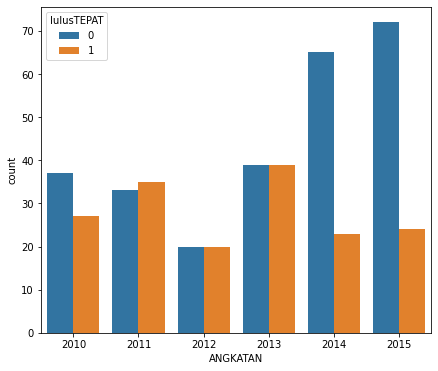

In [ ]:
#TAHUN
# sns.plot(df_finalis.IPK.TAHUN,data=df_siswa,hue="lulusTEPAT")
plt.figure(figsize=(7,6))
sns.countplot(x = df_finalis.ANGKATAN,hue="lulusTEPAT",data=df_finalis)
plt.show()

# sns.factorplot(x='ANGKATAN', y='lulusTEPAT', data=df_final)

In [ ]:
!pip install -U jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Training

In [ ]:

from jcopml.automl import AutoClassifier

X = df_finalis.drop(columns=['lulusTEPAT','ANGKATAN','SEMESTER','SKS','TAHUN','IPK','lulus'])
y = df_finalis.lulusTEPAT

In [ ]:
# ANGKATAN	IPSmean	SEMESTER	SKS	meNILAI	meBOBOT	TAHUN	IPK	lulusTEPAT

In [ ]:
# jcopml.__version__

In [ ]:
model = AutoClassifier(['IPSmean','meNILAI','meBOBOT','SKSmean'],[],) #sks dan tahun,'IPK','SEMESTER'

# Auto Ml dengan randomsearchcv

In [ ]:
model.fit(X,y, cv=4)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
================== Best Model Info ==================
algo                      | RandomForestClassifier
algo__max_depth           | 55
algo__max_features        | 0.8184656610700978
algo__min_samples_leaf    | 1
algo__n_estimators        | 107

================================ Best Preprocessor Info =================================
categorical_imputer       | SimpleImputer(add_indicator=False, strategy='most_frequent')
categorical_encoder       | OneHotEncoder
numerical_imputer         | KNNImputer(add_indicator=True, n_neighbors=5)

=========== Score ===========
Train: 1.0
Valid: 0.9740711039828922
Test : 1.0


In [ ]:
# model.fit(X,y, algo=['rf'],cv=4,n_trial=120)

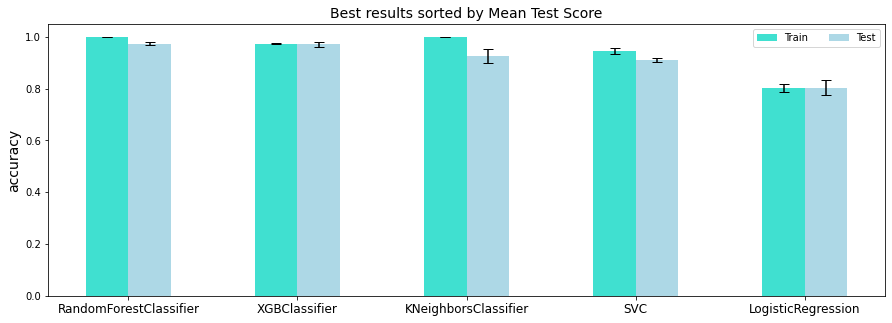

In [ ]:


model.plot_results()

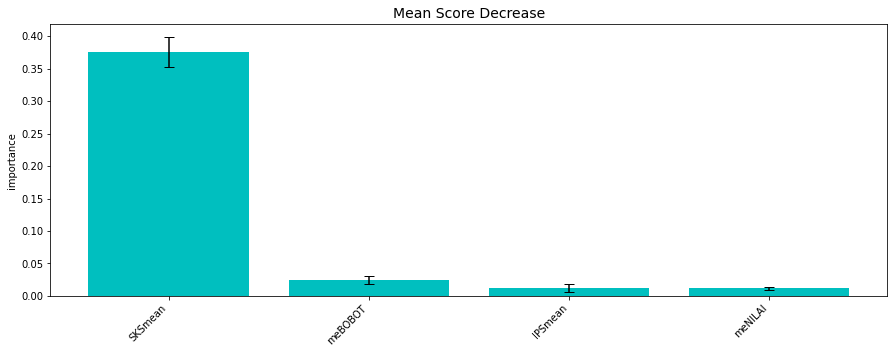

In [ ]:
model.mean_score_decrease()

In [ ]:
y1_pred = model.predict(X)
# y2_pred = m2.predict(X)

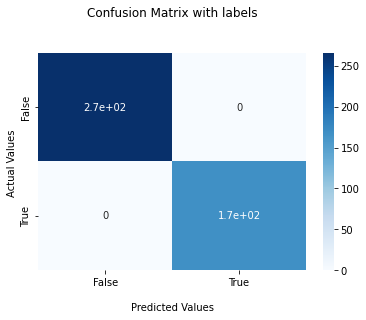

In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y,y1_pred)
matrix



import seaborn as sns
ax = sns.heatmap(matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
# ray = model.predict(predtarg)